# RECOMMENDATION SYSTEMS

In [2]:
%matplotlib inline

from sklearn.model_selection import train_test_split
import time
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

In [3]:
os.chdir(r'C:\Users\ascd0\Downloads')

In [4]:
phData_1=pd.read_csv("phone_user_review_file_1.csv",encoding = "ISO-8859-1")
phData_2=pd.read_csv("phone_user_review_file_2.csv",encoding = "ISO-8859-1")
phData_3=pd.read_csv("phone_user_review_file_3.csv",encoding = "ISO-8859-1")
phData_4=pd.read_csv("phone_user_review_file_4.csv",encoding = "ISO-8859-1")
phData_5=pd.read_csv("phone_user_review_file_5.csv",encoding = "ISO-8859-1")
phData_6=pd.read_csv("phone_user_review_file_6.csv",encoding = "ISO-8859-1")

In [5]:
print(f"shape of file1 is {phData_1.shape} and size is {phData_1.size}")
print(f"shape of file2 is {phData_2.shape} and size is {phData_2.size}")
print(f"shape of file3 is {phData_3.shape} and size is {phData_3.size}")
print(f"shape of file4 is {phData_4.shape} and size is {phData_4.size}")
print(f"shape of file5 is {phData_5.shape} and size is {phData_5.size}")
print(f"shape of file6 is {phData_6.shape} and size is {phData_6.size}")

shape of file1 is (374910, 11) and size is 4124010
shape of file2 is (114925, 11) and size is 1264175
shape of file3 is (312961, 11) and size is 3442571
shape of file4 is (98284, 11) and size is 1081124
shape of file5 is (350216, 11) and size is 3852376
shape of file6 is (163837, 11) and size is 1802207


In [6]:
phData_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374910 entries, 0 to 374909
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   phone_url  374910 non-null  object 
 1   date       374910 non-null  object 
 2   lang       374910 non-null  object 
 3   country    374910 non-null  object 
 4   source     374910 non-null  object 
 5   domain     374910 non-null  object 
 6   score      366691 non-null  float64
 7   score_max  366691 non-null  float64
 8   extract    371934 non-null  object 
 9   author     371641 non-null  object 
 10  product    374910 non-null  object 
dtypes: float64(2), object(9)
memory usage: 31.5+ MB


In [7]:
phData_1.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [8]:
pdata=pd.DataFrame()
pdata=pdata.append(phData_1)
pdata=pdata.append(phData_2)
pdata=pdata.append(phData_3)
pdata=pdata.append(phData_4)
pdata=pdata.append(phData_5)
pdata=pdata.append(phData_6)

In [9]:
pdata.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [10]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


#From above we can understand our dataset have 1415133 entries. 9 objects and 2 float types are present. Seems all columns dont have all entries.

In [11]:
pdata.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [12]:
pdata.describe(include=object).T

,count,unique,top,freq
phone_url,1415133,5556,/cellphones/samsung-galaxy-s-iii/,17093
date,1415133,7728,7/18/2016,3244
lang,1415133,22,en,554746
country,1415133,42,us,318435
source,1415133,331,Amazon,728471
domain,1415133,384,amazon.com,214776
extract,1395772,1321353,#NAME?,667
author,1351931,801103,Amazon Customer,76978
product,1415132,61313,"Lenovo Vibe K4 Note (White,16GB)",5226


In [13]:
pdata.score.unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

In [14]:
pdata.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [15]:
# how many total missing values do we have?
missing_values_count = pdata.isnull().sum()

total_cells = np.product(pdata.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.3461118302854025

In [16]:
pdata.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [17]:
#Lets impute score column missing vlaues with mean
pdata['score'] = pdata['score'].fillna((pdata['score'].mean()))

In [18]:
#Score MAx and Extract are not much useful for predticng...we can drop them. Lets impute AUthor & product column missing values 
#with Top value of it.
top_author= pdata.describe(include=object).T.loc['author']['top']
pdata['author'] = pdata['author'].fillna(top_author)

top_product = pdata.describe(include=object).T.loc['product']['top']
pdata['product'] = pdata['product'].fillna(top_product)

In [19]:
pdata['score']=np.round(pdata.score)
print(pdata.score)

0         10.0
1         10.0
2          6.0
3          9.0
4          4.0
          ... 
163832     2.0
163833    10.0
163834     2.0
163835     8.0
163836     2.0
Name: score, Length: 1415133, dtype: float64


In [20]:
pdata.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    63489
extract      19361
author           0
product          0
dtype: int64

In [21]:
duplicate = pdata[pdata.duplicated()]
duplicate            

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
146836,/cellphones/nokia-8850/,8/31/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÑÐ¾ÑÑÐ¾ Ð¾ÑÐ»Ð¸ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½, ...",Amazon Customer,Nokia 8850
146838,/cellphones/nokia-8850/,6/25/2010,ru,ru,Yandex,market.yandex.ru,10.0,10.0,"ÐÐ° ÑÐ²Ð¾Ð¸ Ð´ÐµÐ½ÑÐ³Ð¸, 1000 Ð´Ð¾Ð»Ð»Ð°ÑÐ...",Amazon Customer,Nokia 8850
158911,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,8.0,NaN,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
160164,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [22]:
#Looks like all duplciate rows are same phones but purchased from different sites...can delete all duplciate rows
print("number duplicate rows in dataset is ",len(duplicate))  

number duplicate rows in dataset is  6436


In [23]:
# dropping ALL duplicte values
pdata.drop_duplicates(inplace = True)

In [24]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408697 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1408697 non-null  object 
 1   date       1408697 non-null  object 
 2   lang       1408697 non-null  object 
 3   country    1408697 non-null  object 
 4   source     1408697 non-null  object 
 5   domain     1408697 non-null  object 
 6   score      1408697 non-null  float64
 7   score_max  1345604 non-null  float64
 8   extract    1389693 non-null  object 
 9   author     1408697 non-null  object 
 10  product    1408697 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.0+ MB


In [25]:
# Keep only 1000000 data samples. Use random state=612
pdata_new = pdata.sample(n=1000000,random_state=612)
pdata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 55265 to 92037
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1000000 non-null  object 
 1   date       1000000 non-null  object 
 2   lang       1000000 non-null  object 
 3   country    1000000 non-null  object 
 4   source     1000000 non-null  object 
 5   domain     1000000 non-null  object 
 6   score      1000000 non-null  float64
 7   score_max  955365 non-null   float64
 8   extract    986449 non-null   object 
 9   author     1000000 non-null  object 
 10  product    1000000 non-null  object 
dtypes: float64(2), object(9)
memory usage: 91.6+ MB


In [26]:
pdata_new.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

#Irrelevant features from our dataset are 
'phone_url', 'date', 'lang', 'country', 'source', 'domain','score_max', 'extract'

Relevant Features
'author', 'product','score'

In [27]:
#Drop Irrlevant Fatures Features
pdata_new = pdata_new[['author', 'product','score']]

print("shape of after dropping Irrelevant Features is ", pdata_new.shape)

shape of after dropping Irrelevant Features is  (1000000, 3)


In [28]:
pdata_new.head(5)

,author,product,score
55265,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8.0
97318,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2.0
104951,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8.0
146543,Jomine Jose,Lava Iris X5 (Black),2.0
194697,Walter,Sony Xperia L C2104 Unlocked Phone--U.S. Warra...,8.0


In [29]:
for i in pdata_new.columns:
    print(f"unique {i} values :")
    print(f"{pdata_new[i].unique()}\n")

unique author values :
['Vinod Kumar Chengespur' 'Sharon' 'An Sionnach' ... 'loca14325'
 'John, Glasgow' 'GEORGESDEBOTE']

unique product values :
['Lenovo Vibe K4 Note (White,16GB)'
 'HTC Desire 816 Black (Virgin mobile) - 5.5 inch S-LCD Display'
 'Xperia Sony Xperia Z Ultra SIM-free Android Smartphone - Black' ...
 'Meizu U20 16Gb'
 'Nokia Lumia 620 - MÃ³vil libre (pantalla tÃ¡ctil de 3.8 pulgadas, 512 MB de RAM) - negro'
 'Apple iPhone 8 GB Cellulare UMTS (senza vincolo operatori, colore: Nero']

unique score values :
[ 8.  2. 10.  6.  9.  4.  1.  7.  5.  3.  0.]



In [30]:
# Number of unique user id and product id in the data
print('Number of unique Authors in Raw data = ', pdata_new['author'].nunique())
print('Number of unique Products in Raw data = ', pdata_new['product'].nunique())
print('Number of unique Scorings in Raw data = ', pdata_new['score'].nunique())


Number of unique Authors in Raw data =  597173
Number of unique Products in Raw data =  56396
Number of unique Scorings in Raw data =  11


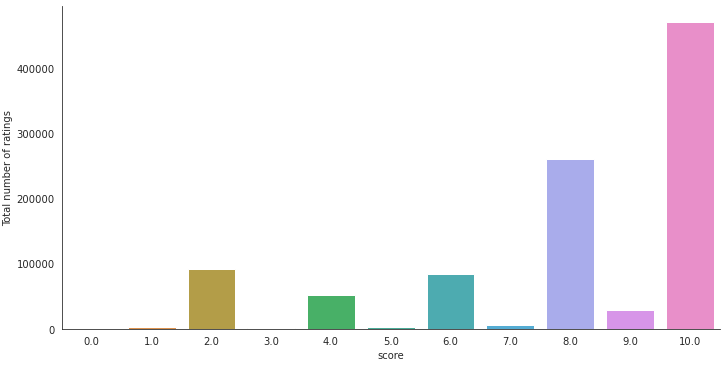

In [31]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("score", data=pdata_new, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [32]:
pdata_x = pdata_new.copy()

In [33]:
#products with top score values
pd.DataFrame(pdata_new.groupby('product')['score'].mean().head())

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.000000
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",7.388889
(Part 2) Lenovo VIBE X2,8.000000


In [34]:
#Top Products
top_products = pd.DataFrame(pdata_new.groupby('product')['score'].mean().sort_values(ascending=False))
top_products

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0
Samsung Galaxy W GT-I8150 Black Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½,10.0
HTC HC M130 Dot Etui flip pour HTC Desire 510 Gris FoncÃ©,10.0
HTC HC V890 Etui flip pour HTC Desire 601 Noir/Rouge,10.0
HTC HD7 / Windows 7 / Sim Free / Unlocked / Mobile Phone,10.0
...,...
Pantech & Curitel Flex (AT&T),1.0
Samsung UpStage (SPH-m620),1.0
Sony Xperia Z2 (black),1.0


In [35]:
#Lets check the products with score 10
top_products[top_products['score']==10.0]

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0
Samsung Galaxy W GT-I8150 Black Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½,10.0
HTC HC M130 Dot Etui flip pour HTC Desire 510 Gris FoncÃ©,10.0
HTC HC V890 Etui flip pour HTC Desire 601 Noir/Rouge,10.0
HTC HD7 / Windows 7 / Sim Free / Unlocked / Mobile Phone,10.0
...,...
Wiko CINK Five 4 Go Noir Android 4.1.2 (Jelly Bean),10.0
Sony-Ericsson T250i,10.0
"Apple iPhone 6 - Smartphone libre iOS (pantalla 4.7"", cÃ¡mara 8 Mp, 16 GB, Dual-Core 1.4 GHz, 1 GB RAM), color gris - (Reacondicionado Certificado) [Incluye enchufe europeo]",10.0


In [36]:
#we have 9236 products with highest score

In [37]:
#Last 10 products with lowest score
pd.DataFrame(pdata_new.groupby('product')['score'].mean().sort_values(ascending=False).tail(10))

,score
product,
Iphone: apple Apple iPhone 3G (16 GB),1.0
Samsung Blast,1.0
Samsung SGH-D407,1.0
Motorola C290,1.0
Motorola V180 (Unlocked),1.0
Pantech & Curitel Flex (AT&T),1.0
Samsung UpStage (SPH-m620),1.0
Sony Xperia Z2 (black),1.0
BlackBerry 9520 Storm2,1.0


In [38]:
#Top products with most scores
scores_mean_count = pd.DataFrame(pdata_new.groupby('product')['score'].mean())
scores_mean_count['score_counts'] = pd.DataFrame(pdata_new.groupby('product')['score'].count())  

In [39]:
#list of phones with highest score count
scores_mean_count.sort_values(by='score_counts',ascending=False)[:10]

,score,score_counts
product,,
"Lenovo Vibe K4 Note (White,16GB)",7.177358,3710
"Lenovo Vibe K4 Note (Black, 16GB)",7.200130,3083
"OnePlus 3 (Graphite, 64 GB)",8.737716,2890
"OnePlus 3 (Soft Gold, 64 GB)",8.503569,2522
Samsung Galaxy Express I8730,8.231823,1898
Huawei P8lite zwart / 16 GB,8.463325,1895
"Lenovo Vibe K5 (Gold, VoLTE update)",6.820655,1801
Samsung Galaxy S6 zwart / 32 GB,9.004194,1669
Nokia 5800 XpressMusic,8.246174,1503


In [40]:
# Top authors based on score given by them
most_rated = pdata_new.groupby('author')['score'].count().sort_values(ascending=False)
most_rated.head(10)

author
Amazon Customer    98351
Cliente Amazon     13661
e-bit               5959
Client d'Amazon     5495
Amazon Kunde        3283
Anonymous           1970
einer Kundin        1890
einem Kunden        1350
unknown             1206
Anonymous           1014
Name: score, dtype: int64

In [41]:
#during data cleaning we have replaced all NAN values with top author 'Amazon Customer'....so can observe more reviews for this.

Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset

In [42]:
#Authors who given more than 50 ratings
df_new=pdata_new.groupby('author').filter(lambda x:x['score'].count() >=50)

In [43]:
df_new.head(5)

,author,product,score
194697,Walter,Sony Xperia L C2104 Unlocked Phone--U.S. Warra...,8.0
230845,Cliente Amazon,"Microsoft Telefonia Lumia 950 XL Smartphone, 3...",8.0
249043,Amazon Customer,Samsung C5212,10.0
270706,Amazon Customer,Nokia E52,10.0
15508,Amazon Customer,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,2.0


In [44]:
df_new.shape

(212247, 3)

In [45]:
#Top products with most scores
scores_mean_count50 = pd.DataFrame(df_new.groupby('product')['score'].mean())
scores_mean_count50['score_counts'] = pd.DataFrame(pdata_new.groupby('product')['score'].count())


<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

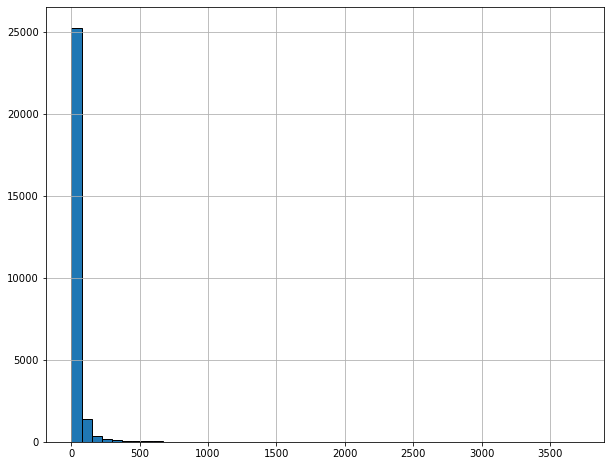

In [46]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
scores_mean_count50['score_counts'].hist(bins=50)

<AxesSubplot:xlabel='product'>

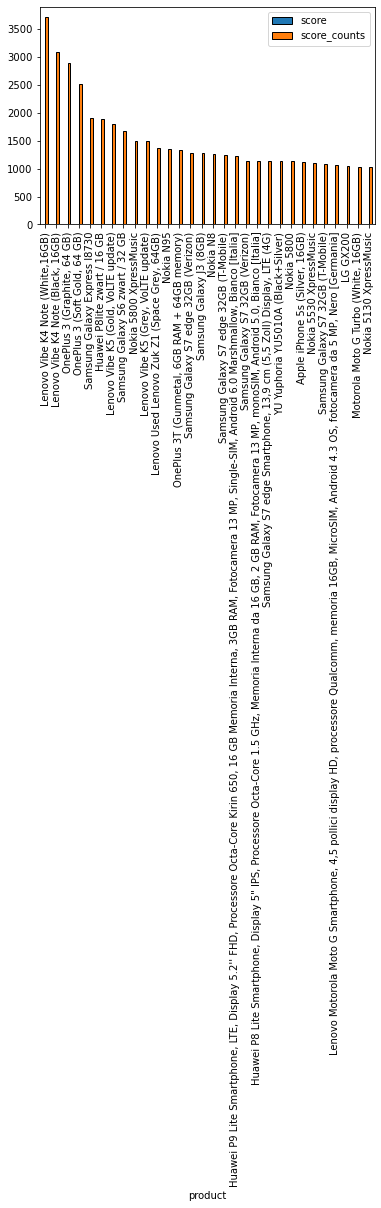

In [47]:
popular = scores_mean_count50.sort_values(by='score_counts',ascending=False)
popular.head(30).plot(kind = "bar")

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

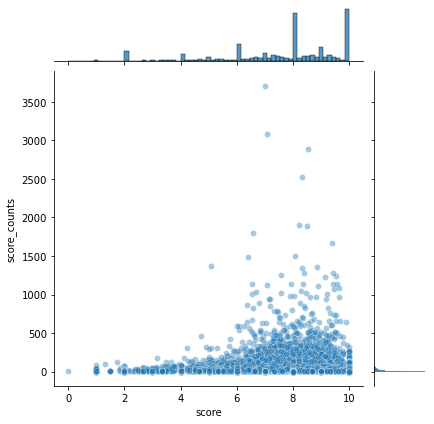

In [48]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='score', y='score_counts', data=scores_mean_count50, alpha=0.4)

From above graph we can observe, products with higher average ratings actually have more number of ratings, compared with products that have lower average ratings.

In [49]:
#filter products whcih have score count > 50
final_df=scores_mean_count50[scores_mean_count50['score_counts'] > 50]
print("shape of final set is ",final_df.shape)

shape of final set is  (4049, 2)


In [50]:
final_df.head()

,score,score_counts
product,,
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),5.200000,76
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",9.555556,60
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",8.727273,62
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",8.779661,189
"AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)",9.090909,74


recommend top 5 mobile phones.

In [51]:
#Sort the products on recommendation score 
popular_5 = final_df.sort_values(['score_counts', 'score'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
popular_5['Rank'] = popular_5['score_counts'].rank(ascending=0, method='first') 

In [52]:
popular_5.head(5)

,score,score_counts,Rank
product,,,
"Lenovo Vibe K4 Note (White,16GB)",6.990876,3710,1.0
"Lenovo Vibe K4 Note (Black, 16GB)",7.061133,3083,2.0
"OnePlus 3 (Graphite, 64 GB)",8.532517,2890,3.0
"OnePlus 3 (Soft Gold, 64 GB)",8.307692,2522,4.0
Samsung Galaxy Express I8730,8.232044,1898,5.0


!pip install surprise

In [53]:
pdata_new.head(5)

,author,product,score
55265,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8.0
97318,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2.0
104951,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8.0
146543,Jomine Jose,Lava Iris X5 (Black),2.0
194697,Walter,Sony Xperia L C2104 Unlocked Phone--U.S. Warra...,8.0


In [54]:
pdata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 55265 to 92037
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   author   1000000 non-null  object 
 1   product  1000000 non-null  object 
 2   score    1000000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 50.5+ MB


In [55]:
#limit data to 5000 samples
prod_df = pdata_new.head(5000)
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 55265 to 4495
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   author   5000 non-null   object 
 1   product  5000 non-null   object 
 2   score    5000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 156.2+ KB


# WEIGHTED AVG Method (Using COSINE Similarity and SVD)

lets find the similarity between the products. We will use the correlation between the scores of a products as the similarity metric.

To find the correlation between the scores of a products, we need to create a matrix where each column is a product name and each row contains the score assigned by a specific author to that product.

This matrix will have a lot of null values since every product is not rated by every author.

In [62]:
scores_matrix = prod_df.pivot_table(index='author', columns='product', values='score')

scores_matrix = scores_matrix.fillna(scores_matrix.mean(axis=0))
author = scores_matrix.index
product = scores_matrix.columns
print('Shape of scores_matrix: ', scores_matrix.shape)
scores_matrix.head(5)

Shape of scores_matrix:  (4178, 3763)


product,"2014 Newest THL T6 Pro 5.0"" Android 4.4 Unlocked 3G Smartphone -- IPS Touch Screen MT6592M Octa-Core 1.4GHz GSM...",232E,2865i,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5830 [Appareils Ã©lectroniques],"32nd Coque Case Etui Housse antichocs pour Sony Xperia Z (L36h / L36i / C6603), avec protecteur dÃ©cran, chiffon de nettoyage et un stylet - Vert",5165,6126 / 6131 / 6133,6340i,6682 / 6681,8390,...,"Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia 225 2.8"" Black",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia C5-00.2 White,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung E2232 White,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung GT-E2330 Black,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Sony Xperia U,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ LG P715 Optimus L7 Dual II White,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Nokia X1-01 Dual Dark Grey,×××¤×× ×¡××××¨× Apple iPhone 5s 16GB SimFree ××××¦×¨×,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× Samsung Galaxy S8 Plus 64GB
author,,,,,,,,,,,,,,,,,,,,,
#,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
#me,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
***COMPRANDO_TRANQUILO***,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
***JJ***,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
0ieR,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0


In [63]:
#since NaNs cannot be handled by training algos, replacing these by Mean values

scores_matrix['user_index'] = np.arange(0, scores_matrix.shape[0], 1)
scores_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
scores_matrix.head()

product,"2014 Newest THL T6 Pro 5.0"" Android 4.4 Unlocked 3G Smartphone -- IPS Touch Screen MT6592M Octa-Core 1.4GHz GSM...",232E,2865i,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5830 [Appareils Ã©lectroniques],"32nd Coque Case Etui Housse antichocs pour Sony Xperia Z (L36h / L36i / C6603), avec protecteur dÃ©cran, chiffon de nettoyage et un stylet - Vert",5165,6126 / 6131 / 6133,6340i,6682 / 6681,8390,...,"Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia 225 2.8"" Black",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia C5-00.2 White,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung E2232 White,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung GT-E2330 Black,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Sony Xperia U,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ LG P715 Optimus L7 Dual II White,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Nokia X1-01 Dual Dark Grey,×××¤×× ×¡××××¨× Apple iPhone 5s 16GB SimFree ××××¦×¨×,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× Samsung Galaxy S8 Plus 64GB
user_index,,,,,,,,,,,,,,,,,,,,,
0,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
1,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
2,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
3,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0
4,8.0,1.0,8.0,2.0,2.0,8.0,8.0,4.0,10.0,7.0,...,10.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,5.0,8.0


In [64]:
#calculate the similarity between the users.

# user similarity on replacing NAN by item avg
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(scores_matrix)

similarity_with_product = pd.DataFrame(cosine,index=scores_matrix.index)

similarity_with_product.columns = scores_matrix.index
similarity_with_product.sample(5)

user_index,0,1,2,3,4,5,6,7,8,9,...,4168,4169,4170,4171,4172,4173,4174,4175,4176,4177
user_index,,,,,,,,,,,,,,,,,,,,,
1152,0.999998,1.000000,1.000000,0.999970,0.999970,0.999983,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.999997,0.999996,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999983
563,0.999998,1.000000,1.000000,0.999970,0.999970,0.999983,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.999997,0.999996,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999983
3422,0.999996,0.999998,0.999998,0.999968,0.999968,0.999981,0.999998,0.999998,0.999998,0.999998,...,0.999998,0.999995,0.999994,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999981
179,0.999998,1.000000,1.000000,0.999970,0.999970,0.999983,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.999997,0.999996,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999983
1489,0.999998,1.000000,1.000000,0.999970,0.999970,0.999983,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.999997,0.999996,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999983


From above we can observe cosine similarity between some authors as 1.

# Generate the predicted ratings using SVD

In [65]:
#SVD with no.of singular values to be 50
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(scores_matrix, k = 50)
sigma = np.diag(sigma)
all_user_predicted_scores = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_scores, columns = scores_matrix.columns)
preds_df.head()

product,"2014 Newest THL T6 Pro 5.0"" Android 4.4 Unlocked 3G Smartphone -- IPS Touch Screen MT6592M Octa-Core 1.4GHz GSM...",232E,2865i,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5830 [Appareils Ã©lectroniques],"32nd Coque Case Etui Housse antichocs pour Sony Xperia Z (L36h / L36i / C6603), avec protecteur dÃ©cran, chiffon de nettoyage et un stylet - Vert",5165,6126 / 6131 / 6133,6340i,6682 / 6681,8390,...,"Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia 225 2.8"" Black",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Nokia C5-00.2 White,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung E2232 White,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung GT-E2330 Black,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Sony Xperia U,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ LG P715 Optimus L7 Dual II White,Ð¢ÐµÐ»ÐµÑÐ¾Ð½ Nokia X1-01 Dual Dark Grey,×××¤×× ×¡××××¨× Apple iPhone 5s 16GB SimFree ××××¦×¨×,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× Samsung Galaxy S8 Plus 64GB
0,7.999725,0.999966,7.999725,1.999931,1.999931,7.999725,7.999725,3.999862,9.999656,6.999759,...,9.999656,7.999725,7.999725,7.999725,9.999656,9.999656,9.999656,9.999656,4.999827,7.999725
1,8.000000,1.000000,8.000000,2.000000,2.000000,8.000000,8.000000,4.000000,10.000000,7.000000,...,10.000000,8.000000,8.000000,8.000000,10.000000,10.000000,10.000000,10.000000,5.000000,8.000000
2,8.000000,1.000000,8.000000,2.000000,2.000000,8.000000,8.000000,4.000000,10.000000,7.000000,...,10.000000,8.000000,8.000000,8.000000,10.000000,10.000000,10.000000,10.000000,5.000000,8.000000
3,7.999224,0.999903,7.999224,1.999806,1.999806,7.999224,7.999224,3.999612,9.999030,6.999321,...,9.999030,7.999224,7.999224,7.999224,9.999030,9.999030,9.999030,9.999030,4.999484,7.999224
4,8.000776,1.000097,8.000776,2.000194,2.000194,8.000776,8.000776,4.000388,10.000970,7.000679,...,10.000970,8.000776,8.000776,8.000776,10.000970,10.000970,10.000970,10.000970,5.000516,8.000776


In [66]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, scores_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = scores_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [80]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 1
num_recommendations = 5
recommend_items(userID, scores_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1):

                                                    user_ratings  \
Recommended Items                                                  
Apple iPhone 4 32GB (White) - Verizon                       10.0   
ZTE Axon 7 Mini Smartphone (13,2 cm (5,2 Zoll) ...          10.0   
Motorola L9 SLVR                                            10.0   
Sony Xperia SP SIM-free Android Smartphone - Bl...          10.0   
Samsung Galaxy Note 3 Smartphone (14,5 cm (5,7 ...          10.0   

                                                    user_predictions  
Recommended Items                                                     
Apple iPhone 4 32GB (White) - Verizon                       9.999656  
ZTE Axon 7 Mini Smartphone (13,2 cm (5,2 Zoll) ...          9.999656  
Motorola L9 SLVR                                            9.999656  
Sony Xperia SP SIM-free Android Smartphone - Bl...          9.999656  
Samsung Galaxy Note 3 Smartphone (14,5 c

In [81]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 100
num_recommendations = 5
recommend_items(userID, scores_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 100):

                                                    user_ratings  \
Recommended Items                                                  
ZTE Axon 7 Mini Smartphone (13,2 cm (5,2 Zoll) ...          10.0   
HTC Touch HD T8282                                          10.0   
Apple iPhone 4 32GB (White) - Verizon                       10.0   
thl T100s Smartphone MTK6592 8-Core Android 4.2...          10.0   
Motorola L9 SLVR                                            10.0   

                                                    user_predictions  
Recommended Items                                                     
ZTE Axon 7 Mini Smartphone (13,2 cm (5,2 Zoll) ...              10.0  
HTC Touch HD T8282                                              10.0  
Apple iPhone 4 32GB (White) - Verizon                           10.0  
thl T100s Smartphone MTK6592 8-Core Android 4.2...              10.0  
Motorola L9 SLVR                      

# model-based classification

model-based classification using kNNWithMeans and SVD

In [82]:
from surprise import Dataset,Reader,accuracy
from surprise import SVD,SVDpp,NMF
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNWithMeans,KNNBasic,KNNWithZScore
from collections import defaultdict
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 10))

In [83]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 55265 to 4495
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   author   5000 non-null   object 
 1   product  5000 non-null   object 
 2   score    5000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 316.2+ KB


In [84]:
prod_df.head(5)

,author,product,score
55265,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8.0
97318,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2.0
104951,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8.0
146543,Jomine Jose,Lava Iris X5 (Black),2.0
194697,Walter,Sony Xperia L C2104 Unlocked Phone--U.S. Warra...,8.0


In [85]:
#Reading the dataset
data = Dataset.load_from_df(prod_df,reader)

#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.2,random_state=10)



# ITEM Based 

In [86]:
#trainset = data.build_full_trainset()
# user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

# predict ratings for all pairs (u, i) that are NOT in the training set.
#testset = trainset.build_anti_testset()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [87]:
print("Train Set")
print('algo: {0}, k = {1}, min_k = {2}'.format(algo.__class__.__name__, algo.k, algo.min_k))

Train Set
algo: KNNWithMeans, k = 5, min_k = 1


In [88]:
# raw ids can be obatined as follows

print(trainset.to_raw_uid(5))
print(trainset.to_raw_iid(5))

Cliente Amazon
Huawei Ascend G610 Smartphone, Dual SIM, 4 GB, Bianco


In [89]:
pd.DataFrame(testset)

,0,1,2
0,Marie Wilson,Motorola KRZR K1 Unlocked Cell Phone with 2 MP...,2.0
1,phone,Nokia 5610 XpressMusic Unlocked Cell Phone wit...,2.0
2,christin,Acer Liquid M220 Windows Phone 8.1 Dual-SIM ( ...,6.0
3,cherry1618,"Sony Ericsson Txt pro Smartphone (7,6 cm (3,0 ...",10.0
4,Edmund D'souza,Motorola DROID 3 (Verizon Wireless),8.0
...,...,...,...
995,ÐÑÐ¾Ð¼Ð¾Ð² Ð Ð¾Ð¼Ð°Ð½,LG G2 D802 32Gb,10.0
996,Soulseeker,Nokia Lumia 920 32GB Unlocked 4G LTE Windows S...,10.0
997,delhip,VIVO V3 (Gold),10.0
998,mascret,CAMPUS TELECOM Ãtui Housse Folio fenÃªtre OR ...,10.0


In [90]:
prod_df[prod_df['author'] == 'naptown2']

,author,product,score
149385,naptown2,LG Optimus G Sprint,10.0


In [91]:
prod_df[prod_df['author'] == "Edmund D'souza"]

,author,product,score
207099,Edmund D'souza,Motorola DROID 3 (Verizon Wireless),8.0


In [92]:
algo.predict(uid='naptown2', iid='LG Optimus G Sprint', r_ui=None)

Prediction(uid='naptown2', iid='LG Optimus G Sprint', r_ui=None, est=10, details={'actual_k': 1, 'was_impossible': False})

In [93]:
algo.predict(uid="Edmund D'souza", iid='Motorola DROID 3 (Verizon Wireless)', r_ui=None)

Prediction(uid="Edmund D'souza", iid='Motorola DROID 3 (Verizon Wireless)', r_ui=None, est=8.071, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [94]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [95]:
pd.DataFrame(test_pred)

,uid,iid,r_ui,est,details
0,Marie Wilson,Motorola KRZR K1 Unlocked Cell Phone with 2 MP...,2.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
1,phone,Nokia 5610 XpressMusic Unlocked Cell Phone wit...,2.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
2,christin,Acer Liquid M220 Windows Phone 8.1 Dual-SIM ( ...,6.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
3,cherry1618,"Sony Ericsson Txt pro Smartphone (7,6 cm (3,0 ...",10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
4,Edmund D'souza,Motorola DROID 3 (Verizon Wireless),8.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
...,...,...,...,...,...
995,ÐÑÐ¾Ð¼Ð¾Ð² Ð Ð¾Ð¼Ð°Ð½,LG G2 D802 32Gb,10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
996,Soulseeker,Nokia Lumia 920 32GB Unlocked 4G LTE Windows S...,10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
997,delhip,VIVO V3 (Gold),10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
998,mascret,CAMPUS TELECOM Ãtui Housse Folio fenÃªtre OR ...,10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."


In [98]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 2.7060


2.7059999141159867

In [99]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [100]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
106,ÐÐ°Ð²ÐµÐ»,Nokia 101,10.0,10.0,"{'actual_k': 0, 'was_impossible': False}",2,1,0.0
144,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.0,10.0,"{'actual_k': 5, 'was_impossible': False}",401,15,0.0
392,Amazon Customer,"OnePlus 2 (Sandstone Black, 64GB)",10.0,10.0,"{'actual_k': 0, 'was_impossible': False}",401,1,0.0
385,Amazon Customer,Lenovo S820 4Gb,10.0,10.0,"{'actual_k': 0, 'was_impossible': False}",401,1,0.0
74,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.0,10.0,"{'actual_k': 5, 'was_impossible': False}",401,15,0.0
78,Cliente Amazon,Lenovo Moto G4 - Smartphone libre Android (5.5...,10.0,10.0,"{'actual_k': 5, 'was_impossible': False}",54,2,0.0
635,Amazon Customer,Samsung S5610,8.0,8.0,"{'actual_k': 0, 'was_impossible': False}",401,1,0.0
125,Amazon Customer,"Lenovo Motorola Moto E Smartphone, Display 4.3...",10.0,10.0,"{'actual_k': 0, 'was_impossible': False}",401,1,0.0
802,Amazon Customer,Nokia 5630 XpressMusic,8.0,8.0,"{'actual_k': 0, 'was_impossible': False}",401,1,0.0
599,e-bit,Nokia X2-01,8.0,8.0,"{'actual_k': 0, 'was_impossible': False}",27,1,0.0


|Ui|  is always very small, meaning that very few users have rated the target item. This implies that the set of neighbors is very small (see the actual_k field)... And, it just happens that all the ratings from the neighbors are the same (and mostly, are equal to that of the target user).

we can increase min_k to number like 10....but that would decrease the accuracy

In [101]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
716,Amazon Customer,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",10.0,3.200000,"{'actual_k': 5, 'was_impossible': False}",401,6,6.800000
175,Gast,Asus P535,1.0,8.000000,"{'actual_k': 0, 'was_impossible': False}",1,1,7.000000
869,Amazon Kunde,"Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll ...",2.0,9.000000,"{'actual_k': 0, 'was_impossible': False}",14,2,7.000000
691,Amazon Customer,"Mi Xiaomi Mi Max (Gold, 32GB)",2.0,9.011438,"{'actual_k': 5, 'was_impossible': False}",401,5,7.011438
488,Amazon Customer,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",10.0,2.158498,"{'actual_k': 5, 'was_impossible': False}",401,4,7.841502
789,Luis,Huawei P8 Lite-AM08 - Pack Smartphone Huawei P...,2.0,10.000000,"{'actual_k': 0, 'was_impossible': False}",2,2,8.000000
82,Amazon Customer,Vodafone Smart Prime 6 Pay As You Go Handset S...,10.0,2.000000,"{'actual_k': 0, 'was_impossible': False}",401,1,8.000000
177,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,10.000000,"{'actual_k': 5, 'was_impossible': False}",401,15,8.000000
595,Amazon Customer,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,2.0,10.000000,"{'actual_k': 0, 'was_impossible': False}",401,1,8.000000
42,Amazon Customer,"Motorola Moto G, 4th Gen (White, 16GB) - Andro...",10.0,1.824688,"{'actual_k': 5, 'was_impossible': False}",401,1,8.175312


If we look at index 488 Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) (index#488)...4 users have rated product...model estimated it as 2 agianst actual rating 10....lets see more details about this

<IPython.core.display.Javascript object>


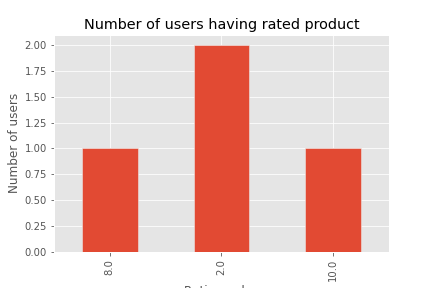

<AxesSubplot:>

Text(0.5, 0, 'Rating value')

Text(0, 0.5, 'Number of users')

Text(0.5, 1.0, 'Number of users having rated product')

In [102]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated product')

In [104]:
#From above figure we can observed two users rated product as 2...where as 2 other users rated same product as 8 and 10.

#S0 model estimated rating as 2 instead of actual predcition 10.

# USER Based

In [105]:
# user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [106]:
testset[0]

('Marie Wilson',
 'Motorola KRZR K1 Unlocked Cell Phone with 2 MP Camera, MP3/Video Player, MicroSD Slot--International Version with No Warranty (Fire Red)',
 2.0)

In [107]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [108]:
pd.DataFrame(test_pred)

,uid,iid,r_ui,est,details
0,Marie Wilson,Motorola KRZR K1 Unlocked Cell Phone with 2 MP...,2.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
1,phone,Nokia 5610 XpressMusic Unlocked Cell Phone wit...,2.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
2,christin,Acer Liquid M220 Windows Phone 8.1 Dual-SIM ( ...,6.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
3,cherry1618,"Sony Ericsson Txt pro Smartphone (7,6 cm (3,0 ...",10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
4,Edmund D'souza,Motorola DROID 3 (Verizon Wireless),8.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
...,...,...,...,...,...
995,ÐÑÐ¾Ð¼Ð¾Ð² Ð Ð¾Ð¼Ð°Ð½,LG G2 D802 32Gb,10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
996,Soulseeker,Nokia Lumia 920 32GB Unlocked 4G LTE Windows S...,10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
997,delhip,VIVO V3 (Gold),10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."
998,mascret,CAMPUS TELECOM Ãtui Housse Folio fenÃªtre OR ...,10.0,8.071,"{'was_impossible': True, 'reason': 'User and/o..."


In [109]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 2.6828


2.682832997538948

In [110]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [111]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
252,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",401,2,0.0
662,Amazon Customer,Samsung Galaxy Ace GT-S5830,8.0,8.0,"{'actual_k': 1, 'was_impossible': False}",401,5,0.0
237,e-bit,Smartphone Samsung Galaxy J7 SM-J700M,10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",27,1,0.0
188,Amazon Customer,Sony Ericsson K550i,10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",401,1,0.0
865,e-bit,Smartphone Samsung Galaxy Gran Prime TV SM-G530,8.0,8.0,"{'actual_k': 2, 'was_impossible': False}",27,3,0.0
584,Anonymous,HTC Desire X,8.0,8.0,"{'actual_k': 0, 'was_impossible': False}",6,2,0.0
582,Amazon Customer,"Apple iPhone 6s Plus (Silver, 16GB)",10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",401,1,0.0
235,einer Kundin,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10.0,10.0,"{'actual_k': 1, 'was_impossible': False}",7,1,0.0
78,Cliente Amazon,Lenovo Moto G4 - Smartphone libre Android (5.5...,10.0,10.0,"{'actual_k': 2, 'was_impossible': False}",54,2,0.0
106,ÐÐ°Ð²ÐµÐ»,Nokia 101,10.0,10.0,"{'actual_k': 0, 'was_impossible': False}",2,1,0.0


In [112]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
671,HalfPint,V400,2.0,8.071000,"{'was_impossible': True, 'reason': 'User and/o...",0,0,6.071000
673,Ð¢Ð¸ÑÐ¾Ð² ÐÐ½ÑÐ¾Ð½,Nokia 220 Dual sim,2.0,8.071000,"{'was_impossible': True, 'reason': 'User and/o...",0,0,6.071000
619,V.Payan : ),COBOT Cubot Smartphone GT95 3G Dual Core MT657...,2.0,8.071000,"{'was_impossible': True, 'reason': 'User and/o...",0,0,6.071000
447,la kkkita,Samsung Galaxy Ace 4,2.0,8.071000,"{'was_impossible': True, 'reason': 'User and/o...",0,0,6.071000
716,Amazon Customer,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",10.0,3.200000,"{'actual_k': 5, 'was_impossible': False}",401,6,6.800000
691,Amazon Customer,"Mi Xiaomi Mi Max (Gold, 32GB)",2.0,8.994611,"{'actual_k': 5, 'was_impossible': False}",401,5,6.994611
177,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,9.981720,"{'actual_k': 5, 'was_impossible': False}",401,15,7.981720
42,Amazon Customer,"Motorola Moto G, 4th Gen (White, 16GB) - Andro...",10.0,2.000000,"{'actual_k': 1, 'was_impossible': False}",401,1,8.000000
488,Amazon Customer,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",10.0,2.000000,"{'actual_k': 2, 'was_impossible': False}",401,4,8.000000
590,Franco,"LG D802 G2 Smartphone, 16 GB, Nero [Italia]",10.0,2.000000,"{'actual_k': 0, 'was_impossible': False}",1,1,8.000000


# SVD

In [113]:
from surprise import SVD
from surprise import accuracy

svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [114]:
testset[0]

('Marie Wilson',
 'Motorola KRZR K1 Unlocked Cell Phone with 2 MP Camera, MP3/Video Player, MicroSD Slot--International Version with No Warranty (Fire Red)',
 2.0)

In [115]:
test_pred = svd_model.test(testset)

In [116]:
# get RMSE
print("SVD Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD Model : Test Set
RMSE: 2.8963


2.8962788431942124

In [117]:
#GOt Best results with KNNWithMeans

# CROSS validations 

In [118]:
##Matrix Factorization Based algorithms
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)

In [119]:
#Matrix Factorization Based algorithms
svd_cv = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=5, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=5, n_jobs=5, verbose=False)

In [121]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE

KNN Basic 	 2.5277 	 1.8967
KNN Means 	 2.5359 	 1.9056
KNN ZScore 	 2.5446 	 1.9101

SVD 		 2.5283 	 1.9171
SVDpp 		 2.5247 	 1.9112
NMF 		 2.6297 	 2.001



#RMSE has been improved as below
KNNMeans - From 2.68/2.70 to 2.55
SVD      - From 2.90      to 2.53

Overall winner is KNN Basic (Best RMSE and MAE)

In [122]:
#Function to return top recommendations
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [123]:
top_n=get_top_n(test_pred, n=5)

In [124]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Marie Wilson ['Motorola KRZR K1 Unlocked Cell Phone with 2 MP Camera, MP3/Video Player, MicroSD Slot--International Version with No Warranty (Fire Red)']
phone ['Nokia 5610 XpressMusic Unlocked Cell Phone with 3.15 MP Camera, International 3G, MP3/Video Player, MicroSD Slot...']
christin ['Acer Liquid M220 Windows Phone 8.1 Dual-SIM ( 10,2 cm (4 Zoll) Display, 5 Megapixel Kamera, Dual Core Prozessor 1,2GHz, 1GB RAM, 8GB interner Speicher ) wei??']
cherry1618 ['Sony Ericsson Txt pro Smartphone (7,6 cm (3,0 Zoll) Touchscreen, QWERTZ-Tastatur, 3 MP Kamera) weiÃ\x9f']
Edmund D'souza ['Motorola DROID 3 (Verizon Wireless)']
max colombo ['Samsung S7390 Galaxy Trend Lite Smartphone, 4 GB, Bianco [Italia]']
thiago martins ['Smartphone LG G2 D805']
Amazon Customer ['Lenovo Vibe K5 (Silver, 16GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)', 'Mi 4i (White, 16GB)']
Aksisey ['Nokia E90 Cep Telefonu']
cuccinella ['Motorola MOTORAZR MAXX V6']
John Andr

sebastian mammone ['Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue']
rouget-net ['Samsung SGH-E250 Crystal Blue (Bleu) - TÃ©lÃ©phone mobile tri-bande - Appareil photo numÃ©rique / lecteur numÃ©rique / radio FM - EDGE - Lecteur TransFlash/microSD']
crazy_sml ['NOKIA 5000 CEP TELEFONU']
Glen A. Urbina Cespedes ['Samsung Galaxy Note N7000 16GB Unlocked Android Smartphone - Dark Blue']
VE-023354 K. ['Sony Xperia Z C6603 Black Factory Unlocked LTE BANDS 1/3/5/7/8/20 International Version No Warranty - Original Sony phone']
Stephan ['Microsoft Nokia Lumia 625 Smartphone (4,7 Zoll (11,9 cm) Touch-Display, 8 GB Speicher, Windows 8) schwarz']
David ['Asus Padfone X, Black 16gb At&t (Phone and Pad At the Same Time) Smartphone']
Heidi Daigle ['BLU Studio C Mini Quad Core, 4.7" IPS, Android 4.4 KK, 4G HSPA+, 5MP Camera - Unlocked Cell Phones - Orange']
expcell ['i670']
irida ['Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore

# In what business scenario you should use popularity based Recommendation Systems ?

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up

if the website is newly launched and it dont have user data then can showup the pupulaity based recommendations to aviod cold start problem. User historic data is not required.

Disadvantage of Popular based model is its not a user personalized.ALl users will get same kind of recommendations

Example:
Google News: News filtered by trending and most popular news.
YouTube: Trending videos.

# In what business scenario you should use CF based Recommendation Systems ?

CF based Recommendations is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. 

if applications have enough user and item purchase data CF based recommendations can be implemented.

# What other possible methods can you think of which can further improve the recommendation for different users ?

Even though CF Based recommendations are smarter they also have cold start problems.if the users dont rate any item or item does not rated by any user then similarity match cant be found.

Enough users required to find a match. To overcome such cold start problems, hybrid approaches are made use of between CF and Content-based matching.